# Stage 1: Preprocess VNG's data
In this stage, we will read raw data from a given dataset. The dataset consists of variable-resolution images, while our system requires a constant input dimensionality. Therefore, we need to down-sampled the images to a fixed resolution (270 x 270)

In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from model.datasets.data import normalize_name_file

normalize_name_file('/home/cpu11757/workspace/Nudity_Detection/src/model/datasets/AdditionalDataset/Normal/4',0,'d_%d')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Example 1: Drop the central region and Resize

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


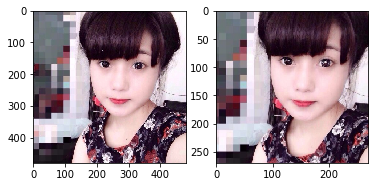

In [39]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import tensorflow as tf
from scipy.misc import imread, imresize
import numpy
import matplotlib.pyplot as plt
from model.datasets.data import preprocess_image

# Test prepprocess_image
image = tf.placeholder("uint8", [None, None, 3])
result_image = preprocess_image(image, 270, 270)

model = tf.initialize_all_variables()

raw_image = imread('model/datasets/nudity_dataset/3.jpg')
with tf.Session() as session:
    session.run(model)
    result = session.run(result_image, feed_dict={image:raw_image})

# Plot the result
fig = plt.figure()
a = fig.add_subplot(1,2,1)
plt.imshow(raw_image)
a = fig.add_subplot(1,2,2)
plt.imshow(result)
plt.show()

## Example 2: Normalize dataset

In [5]:
from IPython.utils import io
#from model.datasets.data import normalize_dataset_type1
#from model.datasets.data import process_raw_dataset
import numpy as np
import os
from shutil import copyfile
import matplotlib.pyplot as plt
import glob


# Normalize the labels of training data
#a = normalize_dataset_type1('/home/cpu11757/workspace/Nudity_Detection/src/model/datasets/labels.csv')
#a = process_raw_dataset('/home/cpu11757/workspace/Nudity_Detection/src/model/datasets/labels.csv','/home/cpu11757/workspace/Nudity_Detection/src/model/datasets')


# Normalize data-set into a 4-D vector (#samples, hight, width, channels)
#dataset = normalize_dataset_type2('/home/cpu11757/workspace/Nudity_Detection/src/model/datasets/nudity_dataset',243)

#print len(dataset)
#fig = plt.figure()
#plt.imshow(dataset[3])
#plt.show()

def process_raw_dataset(raw_path_dir, dist_path, pattern, number_samples, start_idx):
    for idx in np.arange(start_idx, start_idx + number_samples):
        copyfile(os.path.join(raw_path_dir, pattern% idx),
                os.path.join(dist_path, pattern% idx))
    
process_raw_dataset('/home/cpu11757/workspace/Nudity_Detection/src/model/datasets/AdditionalDataset/Normal/4',
                   '/home/cpu11757/workspace/Nudity_Detection/src/model/datasets/train/normal', 'd_%d.jpg', 340, 0)




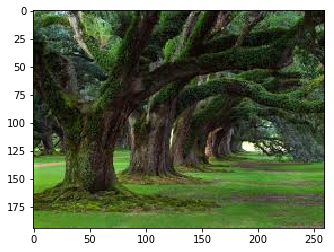

In [33]:
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt

img = imread('/home/cpu11757/workspace/Nudity_Detection/src/model/datasets/train/normal/d_124.jpg')
fig = plt.figure()
plt.imshow(img)
plt.show()


# Stage 2: Build VNG's Model
In this stage, we will a model for recognizing a nudity. The size of our data is too small so we should apply a method called Transfer Learning. Briefly, with the method, we can take advance of another trained model into our model and no need a big size dataset. More detail, we will follow bellow steps:
+ Step 1: Choose a trained model, e.g Inception_V3 of Google
+ Step 2: Change the classify layer of the model by our classify layer
+ Step 3: Do fine-turning to optimize the region of added neurons

## Stage 2.1: Build base model